<a href="https://colab.research.google.com/github/komalgoyal23/Houseprice_prediction/blob/main/PROJECT_HOUSE_PRICE_PREDICTION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#IMPORT LIBRARIES

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.datasets
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor 
from sklearn import metrics

#IMPORT DATASET

In [ ]:
house_price_dataset=sklearn.datasets.load_boston()

In [ ]:
house_price_dataset

# LOADING DATASET INTO PANDAS DATAFRAMES

In [ ]:
house_price_dataframe=pd.DataFrame(house_price_dataset.data, columns=house_price_dataset.feature_names) 

In [ ]:
house_price_dataframe.head()

In [ ]:
#add the target (price) columns to the DATAFRAME 

In [ ]:
house_price_dataframe["price"]=house_price_dataset.target

In [ ]:
house_price_dataframe

In [ ]:
house_price_dataframe.shape

In [ ]:
house_price_dataframe.isnull().sum()

In [ ]:
house_price_dataframe.describe()

##understanding the correlation between various features in the dataset


1. Positive Correlation #direct proportion
2. Negative Correlation #indirect proportion

In [ ]:
 correlation=house_price_dataframe.corr()
sns.heatmap(correlation, cbar=True, square=True, fmt=".1f",annot=True, annot_kws={'size':8},cmap="Blues")

In [ ]:
X=house_price_dataframe.drop(["price"], axis=1)
Y=house_price_dataframe["price"]

In [ ]:
print(X)
print(Y)

In [ ]:
 X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.2, random_state=2)

In [ ]:
print(X_train, Y_train, X_test, Y_test)

In [ ]:
print(X.shape, X_train.shape, X_test.shape)

(506, 13) (404, 13) (102, 13)


#MODEL TRAINING

##XG BOOST

In [ ]:
model=XGBRegressor()
model.fit(X_train, Y_train) 

#Evaluation

##Prediction on training data

In [ ]:
training_data_prediction= model.predict(X_train)

In [ ]:
print(training_data_prediction)

#R Squared error

In [ ]:
score_1 = metrics.r2_score(Y_train,training_data_prediction)

#Mean Absolute Eroor

In [ ]:
score_2 = metrics.mean_absolute_error(Y_train, training_data_prediction)
print("R squared error : ", score_1)
print("Mean Absolute Error : ", score_2)

R squared error :  0.9733349094832763
Mean Absolute Error :  1.145314053261634


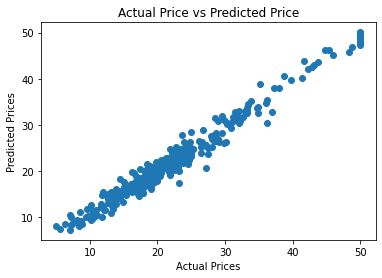

In [ ]:
plt.scatter(Y_train, training_data_prediction)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual Price vs Predicted Price")
plt.show()

In [ ]:
test_data_prediction = model.predict(X_test)

In [ ]:
test_data_prediction 